In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/BTC-USD.csv")

In [3]:
p=14

tr_df=pd.DataFrame()
tr_df['Date']=data['Date']

def FuncionRMA(values,period):
    k=1/period
    result=pd.DataFrame()
    array=[]
    result['RMA']=values.rolling(window=period).mean()
    for i in range(len(values)):
        if(i>period-1):
            result['RMA'][i]=(k*values[i]) + ((1-k)* result['RMA'][i-1])

        else:    
            continue
            
    plt.figure(figsize=(50,10))
    plt.plot(values, label='Valores de entrada', alpha=0.2)
    plt.plot(result['RMA'], label='RMA')
    plt.legend(loc='upper left')
    plt.show()
    
    return result['RMA']

def FuncionEMA(values, period):
    values=pd.Series(values)
    result=pd.DataFrame()
    result['EMA'] = values.ewm(span=period, adjust=False).mean()
    
    plt.figure(figsize=(20,10))
    
    plt.plot(values, label='Valores de entrada', alpha=0.2)
    plt.plot(result['EMA'], label='EMA')

    plt.legend(loc='upper left')
    plt.show()
    
    return result['EMA']

def Calc_TR(dt):
    A=[]
    B=[]
    C=[]
    TR=[]
    
    for i in range(len(dt)):
        uno=dt['High'][i]-dt['Low'][i]
        
        if(i>0):
            dos=np.abs(dt['High'][i]-dt['Close'][i-1])
            tres=np.abs(dt['Low'][i]-dt['Close'][i-1])

        else:
            dos=0
            tres=0
        
        A.append(uno)
        B.append(dos)
        C.append(tres)
        
        TR.append(np.amax([uno,dos,tres]))
    
    tr_df['uno'] = pd.Series(A)
    tr_df['dos'] = pd.Series(B)
    tr_df['tres'] = pd.Series(C)
    tr_df['tr'] = pd.Series(TR)
        
    return pd.Series(TR)

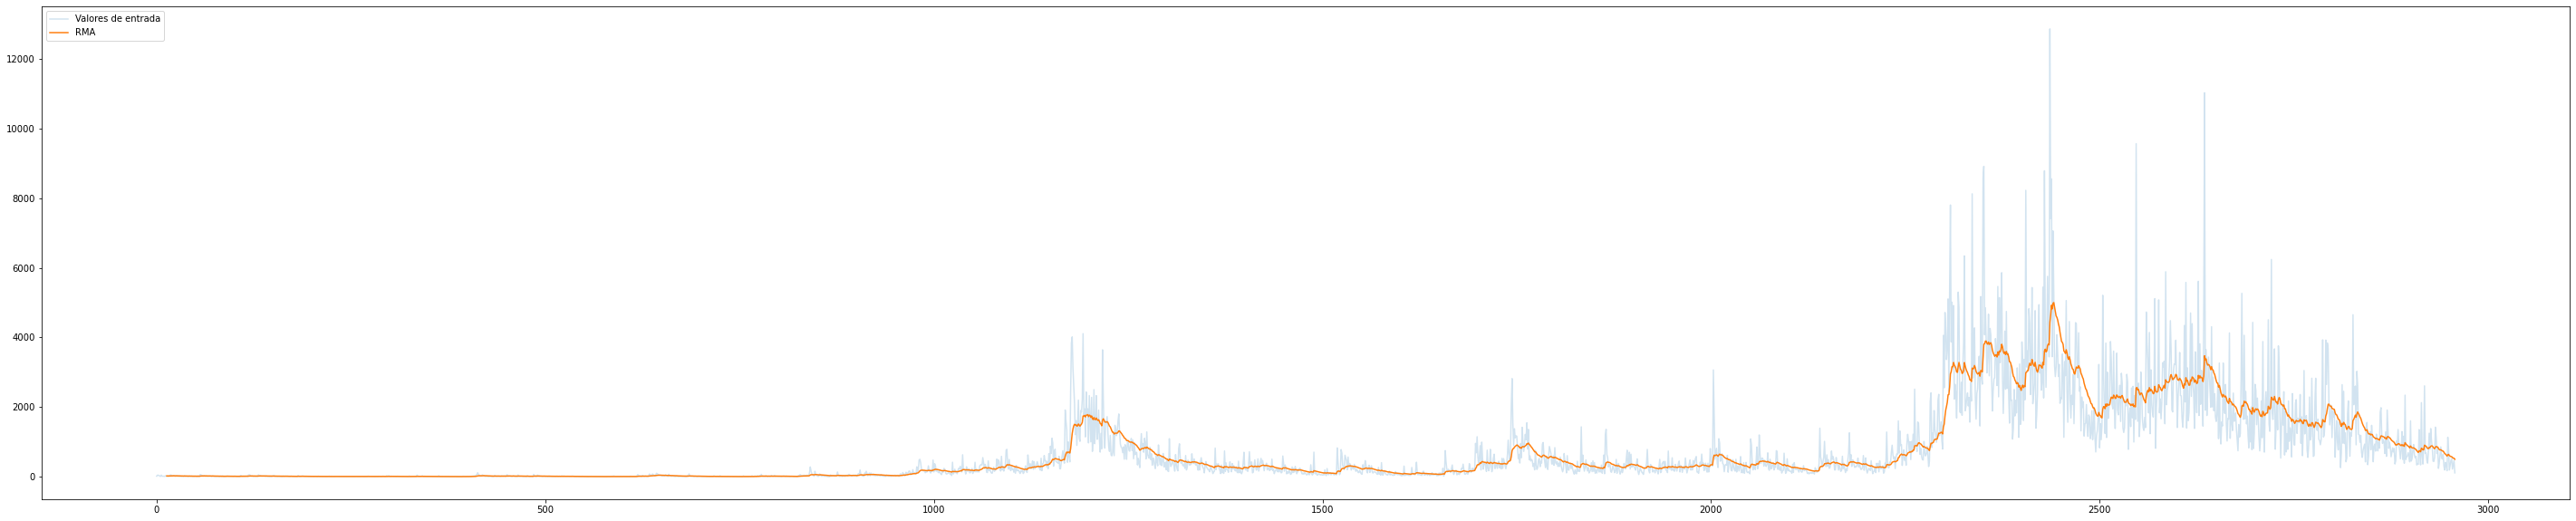

In [7]:
TR = Calc_TR(data)

tr_df['ATR14'] = FuncionRMA(TR,p)
# tr_df['EMA_ATR14']=FuncionEMA(TR,p)

In [6]:
display = None
pd.set_option('display.max_columns', display)
pd.set_option('display.max_rows', display)

tr_df

,Date,uno,dos,tres,tr,ATR14
0,2014-09-17,15.752014,0.000000,0.000000,15.752014,NaN
1,2014-09-18,43.755981,0.474030,44.230011,44.230011,NaN
2,2014-09-19,43.302978,3.394989,39.907989,43.302978,NaN
3,2014-09-20,33.412994,28.500000,4.912994,33.412994,NaN
4,2014-09-21,19.244995,3.522003,15.722992,19.244995,NaN
5,2014-09-22,9.785980,8.094971,1.691009,9.785980,NaN
6,2014-09-23,45.360016,39.404999,5.955017,45.360016,NaN
7,2014-09-24,14.980011,0.321015,14.658996,14.980011,NaN
8,2014-09-25,14.052002,0.315002,13.737000,14.052002,NaN
9,2014-09-26,14.928985,3.363983,11.565002,14.928985,NaN
